[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%203/3.10_custom_train.ipynb)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11493376/11490434 [==============================] - 0s 0us/step


## 8-3-1. train_on_batch

In [ ]:
# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [ ]:
# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 배치 생성 함수
def get_batches(x, y, batch_size=32):
    for i in range(int(x.shape[0] // batch_size)):
        x_batch = x[i * batch_size: (i + 1) * batch_size]
        y_batch = y[i * batch_size: (i + 1) * batch_size]
        yield (np.asarray(x_batch), np.asarray(y_batch))

In [ ]:
# 1개의 배치 로드
x, y = next(get_batches(x_train, y_train))
x.shape, y.shape

((32, 28, 28), (32,))

epoch:1, batch:50, batch_loss: 0.4149, batch_accuracy: 0.8906, avg_loss: 1.0126
epoch:1, batch:100, batch_loss: 0.4460, batch_accuracy: 0.8750, avg_loss: 0.7160
epoch:1, batch:150, batch_loss: 0.2884, batch_accuracy: 0.9141, avg_loss: 0.5941
epoch:1, batch:200, batch_loss: 0.2631, batch_accuracy: 0.9297, avg_loss: 0.5104
epoch:1, batch:250, batch_loss: 0.2216, batch_accuracy: 0.9062, avg_loss: 0.4597
epoch:1, batch:300, batch_loss: 0.2668, batch_accuracy: 0.9062, avg_loss: 0.4207
epoch:1, batch:350, batch_loss: 0.1289, batch_accuracy: 0.9531, avg_loss: 0.3934
epoch:1, batch:400, batch_loss: 0.1146, batch_accuracy: 0.9688, avg_loss: 0.3730
epoch:1, batch:450, batch_loss: 0.1780, batch_accuracy: 0.9375, avg_loss: 0.3504


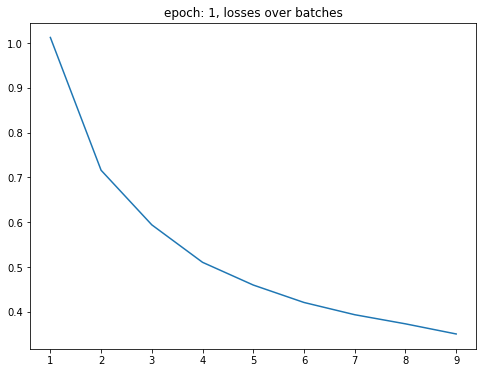

313/313 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9465
------------------------------
epoch:1, val_loss: 0.1730, val_accuracy: 0.946500

epoch:2, batch:50, batch_loss: 0.0892, batch_accuracy: 0.9688, avg_loss: 0.1412
epoch:2, batch:100, batch_loss: 0.2189, batch_accuracy: 0.9531, avg_loss: 0.1552
epoch:2, batch:150, batch_loss: 0.1734, batch_accuracy: 0.9453, avg_loss: 0.1532
epoch:2, batch:200, batch_loss: 0.2262, batch_accuracy: 0.9453, avg_loss: 0.1477
epoch:2, batch:250, batch_loss: 0.0808, batch_accuracy: 0.9766, avg_loss: 0.1455
epoch:2, batch:300, batch_loss: 0.1752, batch_accuracy: 0.9375, avg_loss: 0.1418
epoch:2, batch:350, batch_loss: 0.0557, batch_accuracy: 0.9844, avg_loss: 0.1399
epoch:2, batch:400, batch_loss: 0.0766, batch_accuracy: 0.9688, avg_loss: 0.1400
epoch:2, batch:450, batch_loss: 0.0729, batch_accuracy: 0.9766, avg_loss: 0.1356


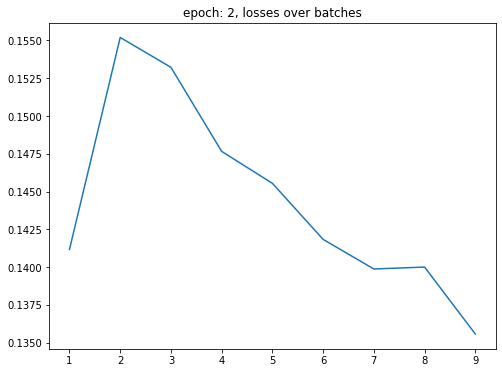

313/313 [==============================] - 1s 2ms/step - loss: 0.1258 - accuracy: 0.9591
------------------------------
epoch:2, val_loss: 0.1258, val_accuracy: 0.959100

epoch:3, batch:50, batch_loss: 0.0538, batch_accuracy: 0.9844, avg_loss: 0.0895
epoch:3, batch:100, batch_loss: 0.1330, batch_accuracy: 0.9688, avg_loss: 0.0959
epoch:3, batch:150, batch_loss: 0.1360, batch_accuracy: 0.9531, avg_loss: 0.0931
epoch:3, batch:200, batch_loss: 0.1692, batch_accuracy: 0.9688, avg_loss: 0.0911
epoch:3, batch:250, batch_loss: 0.0494, batch_accuracy: 0.9922, avg_loss: 0.0904
epoch:3, batch:300, batch_loss: 0.1321, batch_accuracy: 0.9531, avg_loss: 0.0904
epoch:3, batch:350, batch_loss: 0.0252, batch_accuracy: 0.9922, avg_loss: 0.0901
epoch:3, batch:400, batch_loss: 0.0662, batch_accuracy: 0.9844, avg_loss: 0.0909
epoch:3, batch:450, batch_loss: 0.0330, batch_accuracy: 1.0000, avg_loss: 0.0885


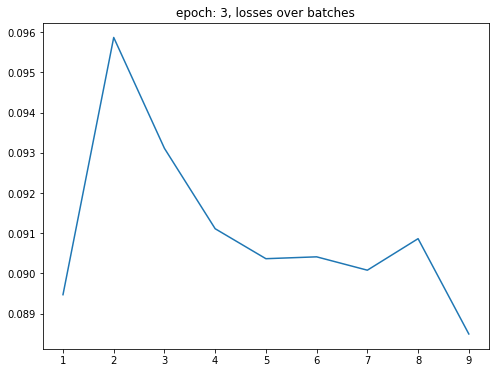

313/313 [==============================] - 1s 2ms/step - loss: 0.0991 - accuracy: 0.9680
------------------------------
epoch:3, val_loss: 0.0991, val_accuracy: 0.968000



In [ ]:
MONITOR_STEP = 50

for epoch in range(1, 4):
    batch = 1
    total_loss = 0
    losses = []
    for x, y in get_batches(x_train, y_train, batch_size=128):
        # 배치별 훈련
        loss, acc = model.train_on_batch(x, y)
        total_loss += loss

        # 출력
        if batch % MONITOR_STEP == 0:    
            losses.append(total_loss / batch)
            print(f'epoch:{epoch}, batch:{batch}, batch_loss: {loss:.4f},\
                    batch_accuracy: {acc:.4f}, avg_loss: {total_loss / batch:.4f}')
        batch += 1
    
    # Loss 시각화
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, batch // MONITOR_STEP+1), losses)
    plt.title(f'epoch: {epoch}, losses over batches')
    plt.show()
    
    # 결과 출력
    loss, acc = model.evaluate(x_test, y_test)
    print('---'*10)
    print(f'epoch:{epoch}, val_loss: {loss:.4f}, val_accuracy: {acc:4f}')
    print()